# 4.19.x Final Assignment

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5)

### Part 1

The `food_consumption.csv` dataset from the `food` folder contains data on the several countries' food consumption per food category and their respective CO2 emissions. Load it to a DataFrame named `food` and check its contents.

In [2]:
food = pd.read_csv('./data/food_consumption.csv')
food.head()

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96


1. Use the `.describe()` method on the `food` DataFrame to produce descriptive statistics about the `consumption` metric for each class in the `food_category` variable. **Which `food_category` has the highest median value of `food_consumption`?** 

In [3]:
food.groupby('food_category')['consumption'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
food_category,,,,,,,,
dairy,130.0,125.774692,93.327721,3.04,45.7925,110.975,192.7150,430.76
wheat,130.0,71.549538,44.191318,2.74,37.0450,69.420,103.3725,197.50
rice,130.0,29.375154,37.324471,0.95,4.7200,11.875,43.4425,171.73
poultry,130.0,21.219231,14.571980,0.47,10.9100,19.855,29.7475,62.50
fish,130.0,17.287077,19.013508,0.24,6.0250,13.950,21.8525,179.71
pork,130.0,16.123692,15.717646,0.00,2.0900,10.355,28.2275,67.11
beef,130.0,12.123385,9.654140,0.78,4.9975,8.285,17.9400,55.48
eggs,130.0,8.163769,5.032582,0.16,3.9450,8.420,12.3125,19.15
nuts,130.0,4.137231,3.372817,0.18,1.8050,3.495,5.6100,23.03


2. In a single chart, plot one boxplot for each `food_category` (11 in total) using the variable `co2_emission` as the metric. **By looking at the chart, which `food_category` has the highest interquartile range (IQR)?**

<AxesSubplot:xlabel='co2_emission', ylabel='food_category'>

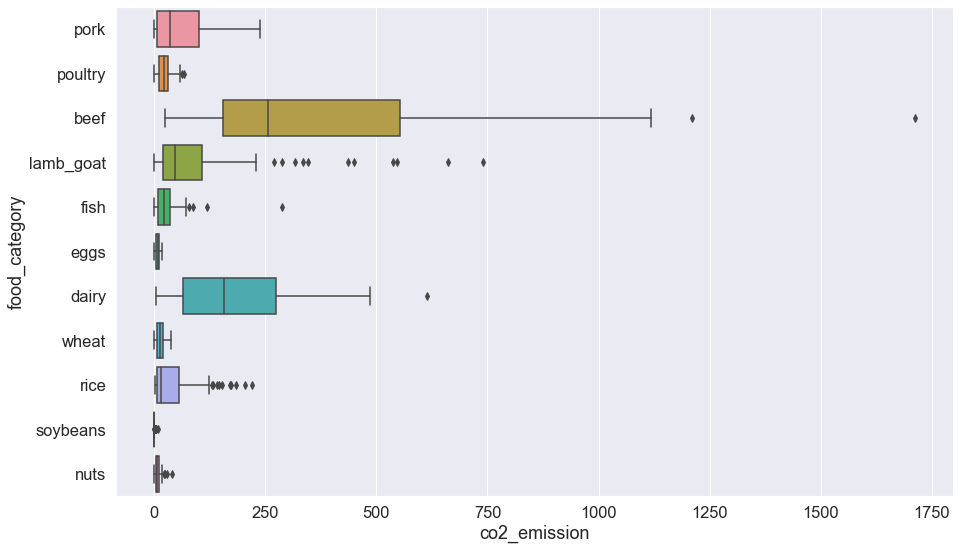

In [4]:
sns.boxplot(x='co2_emission', y='food_category', data=food)

3. Looking at the chart from the previous question, which is the `food_category` with the highest median `co2_emission` value? 

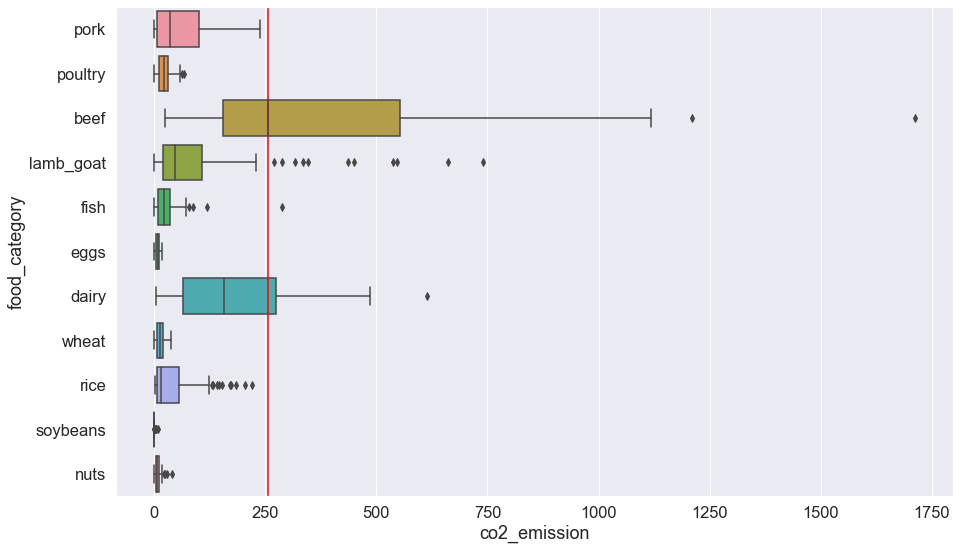

In [5]:
import statistics
plt.figure(1)
sns.boxplot(x='co2_emission', y='food_category', data=food)
plt.axvline(max(food.groupby('food_category')['co2_emission'].median()), color='red')
plt.show()

4. Consider the `consumption` of "poultry" and "fish" across all available `countries`; looking at the table from question 1, the average of poultry consumption (21.22) seems to be higher than that of fish consumption (17.29), but is this difference statistically significant? Create a permutation test in order to assess the null hypothesis that there is no difference between the two means. **Do you accept or reject the null hypothesis?** Explain why. 

In [6]:
from scipy import stats
import  os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [7]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emission   1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [8]:
food.isna().sum()

country          0
food_category    0
consumption      0
co2_emission     0
dtype: int64

In [9]:
food_cons= food.loc[(food['food_category']=='poultry'),['country','consumption']].merge(food.loc[(food['food_category']=='fish'),['country','consumption']], on='country',how='inner')

In [10]:
food_cons.columns=['country','cons_poultry','cons_fish']
food_cons

,country,cons_poultry,cons_fish
0,Argentina,38.66,4.36
1,Australia,46.12,17.69
2,Albania,13.23,3.85
3,Iceland,26.87,74.41
4,New Zealand,34.98,20.36
...,...,...,...
125,Sierra Leone,4.97,32.03
126,Sri Lanka,4.96,24.92
127,Indonesia,7.50,25.65
128,Liberia,8.91,4.13


In [11]:
mu_poultry = np.mean(food_cons['cons_poultry'])
mu_fish = np.mean(food_cons['cons_fish'])
mu_diff = mu_poultry - mu_fish
print('Observed test statistic:', mu_diff)

Observed test statistic: 3.932153846153831


In [12]:
n = 500
mu_diff_samples = []
for i in range(n): 
    df_sample1 = food_cons.sample(frac=0.5, replace=False)
    ix2 = set(food_cons.index) - set(df_sample1.index)
    df_sample2 = food_cons.loc[list(ix2)]
    mu_diff_temp = np.mean(df_sample1['cons_poultry']) - np.mean(df_sample2['cons_fish'])
    mu_diff_samples.append(mu_diff_temp)

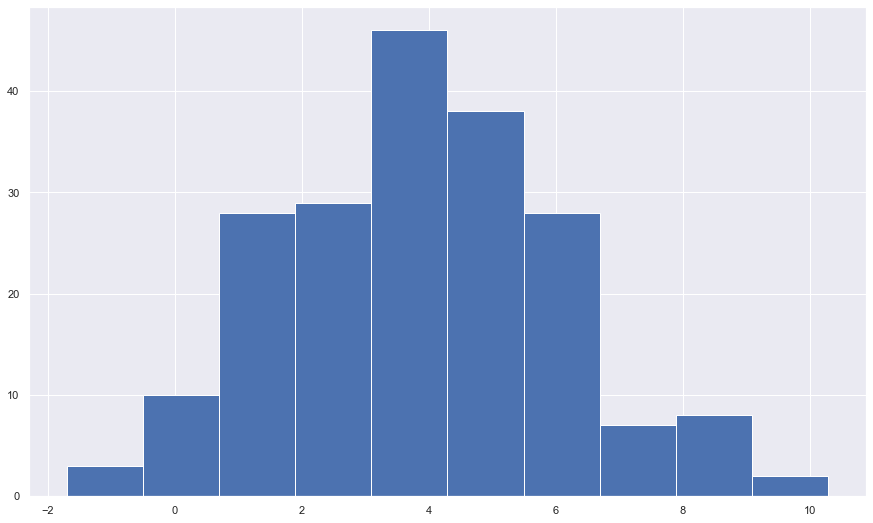

In [13]:
import matplotlib.animation as animation

number_of_frames = 200

def update_hist(num, data):
    plt.cla()
    plt.hist(data[:num])

fig = plt.figure()
hist = plt.hist(mu_diff_samples[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(mu_diff_samples, ) )

from IPython.display import HTML
HTML(animation.to_jshtml())

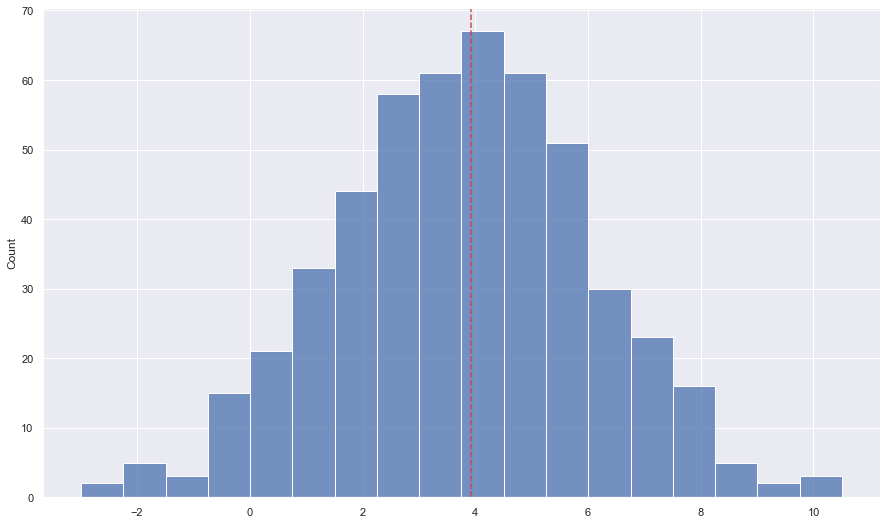

Avgerage Simulated Test Statistic: 3.7956
Initially Observed Test Statistic: 3.9322


In [14]:
sns.histplot(mu_diff_samples)
plt.axvline(mu_diff, 0, 1, color='r', linestyle='--')
plt.show()
print('Avgerage Simulated Test Statistic:', f'{np.mean(mu_diff_samples):.4f}')
print('Initially Observed Test Statistic:', f'{mu_diff:.4f}')

In [15]:
print('Results more extreme than observed:', sum([el >= mu_diff for el in mu_diff_samples]))
print('Total results:', len(mu_diff_samples))
p_value = sum([el > mu_diff for el in mu_diff_samples])/n
print('p-value:', sum([el >= mu_diff for el in mu_diff_samples]), '/', len(mu_diff_samples), '=', p_value)

Results more extreme than observed: 246
Total results: 500
p-value: 246 / 500 = 0.492


In [16]:
alpha = 0.1

if p_value <= alpha: 
    print('H0 rejected: the observed result is statistically significant | p-value <= alpha')
else: 
    print('H0 accepted | the observed result is not statistically significant | p-value > alpha')

H0 accepted | the observed result is not statistically significant | p-value > alpha


### Part 2

The `world_happiness.csv` dataset from the `data` folder contains a series of variables that can be used as a proxy to a country's evaluation of its own goodness of life. The `happiness_score` metric tries to summarise how "happy" each country is. Load and save the dataset to a DataFrame object named `happy`. As always, familiarise yourself with its contents. 

In [17]:
happy = pd.read_csv('./data/world_happiness.csv')

In [18]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          143 non-null    object 
 1   social_support   142 non-null    float64
 2   freedom          142 non-null    float64
 3   corruption       135 non-null    float64
 4   generosity       142 non-null    float64
 5   gdp_per_cap      143 non-null    int64  
 6   life_exp         143 non-null    float64
 7   happiness_score  143 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 9.1+ KB


5. Using a histogram, plot the distribution of the `happiness_score` variable, **which distribution does it resemble?** *(in the answer sheet write the [name of the distribution](https://miro.medium.com/max/962/1*DmPUIjvecL7KllOamoFSDw.png) that best fits the data)* 

In [19]:
happy.describe()

,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
count,142.000000,142.000000,135.000000,142.00000,143.000000,143.000000,143.000000
mean,77.352113,77.000000,73.244444,78.78169,20124.286713,73.796503,77.643357
std,45.743379,45.569058,42.237507,44.87921,20570.547556,7.092194,46.377418
min,1.000000,1.000000,1.000000,1.00000,631.000000,52.900000,0.000000
25%,37.250000,37.500000,37.500000,41.25000,4110.000000,69.100000,36.500000
50%,76.000000,75.500000,74.000000,80.50000,13000.000000,74.900000,79.000000
75%,116.750000,116.750000,109.500000,116.75000,29750.000000,79.650000,118.000000
max,155.000000,155.000000,148.000000,155.00000,113000.000000,85.100000,155.000000


<AxesSubplot:>

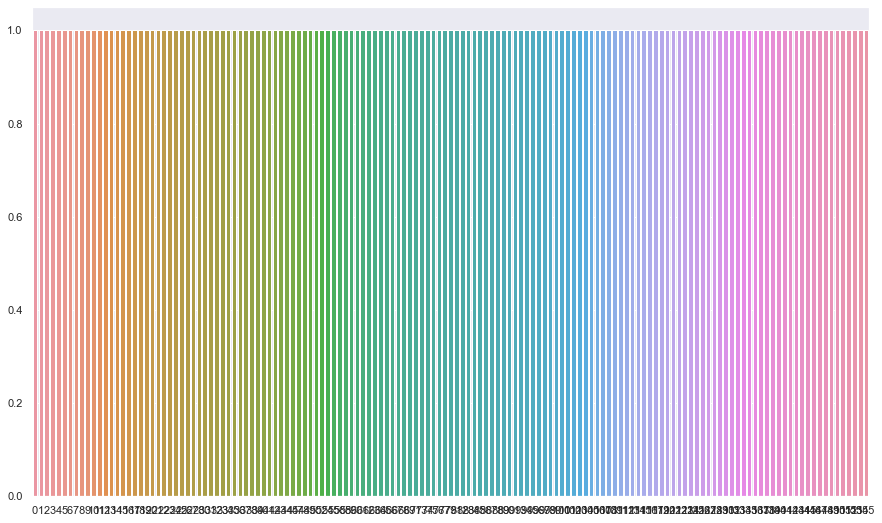

In [20]:
sns.barplot(x = happy.happiness_score.value_counts().index, 
            y = happy.happiness_score.value_counts().values)

6. Plot a correlation matrix (or a correlation heatmap) between all the numeric variables in the dataset. **Which variable is the least correlated with the `happiness_score` metric?** 

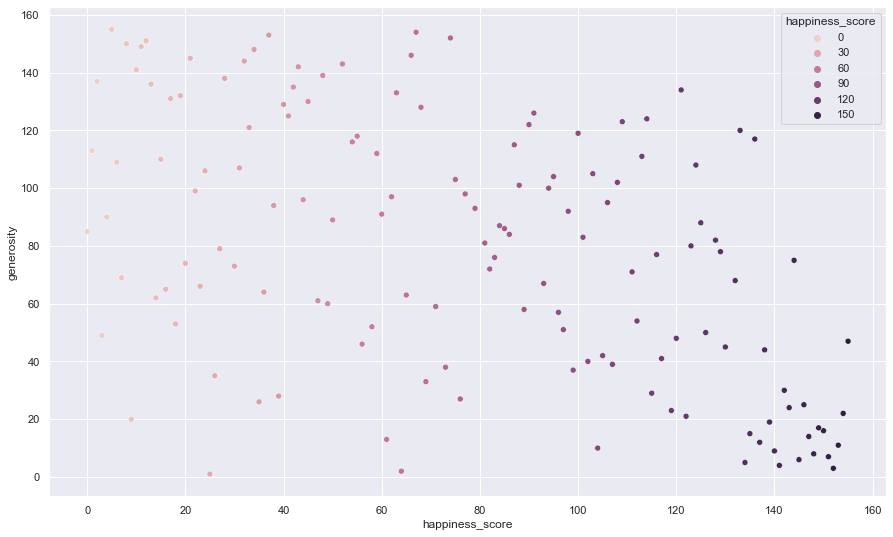

In [21]:
sns.scatterplot(data=happy, x="happiness_score", y="generosity", hue='happiness_score')

plt.show()

7. You may have noticed that the `corruption` metric has some missing values. **How many countries have a missing corruption value?** After you've answered the question, replace all missing values *in all columns of the DataFrame* with the *respective column's mean value*. 

In [22]:
happy['corruption'].describe()

count    135.000000
mean      73.244444
std       42.237507
min        1.000000
25%       37.500000
50%       74.000000
75%      109.500000
max      148.000000
Name: corruption, dtype: float64

In [23]:
happy_clean =happy.copy()

In [24]:
happy_clean = happy['corruption'] = happy_clean['corruption'].fillna(73.24).astype('int64')

In [25]:
happy_clean.describe()

count    143.000000
mean      73.230769
std       41.030509
min        1.000000
25%       39.500000
50%       73.000000
75%      107.500000
max      148.000000
Name: corruption, dtype: float64

8. Use the `statsmodel` package to create a linear regression model where you use `life_exp` to predict the `happiness_score`. After [refreshing your memory on how to interpret a regression coefficient](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/#:~:text=The%20coefficient%20value%20signifies%20how,in%20isolation%20from%20the%20others.), answer the following question: given the model you just created, **a 1-year increase in life expectancy corresponds to an increase of how many points of the happiness score variable?**. 

In [36]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

In [39]:
happy.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,Finland,2.0,5.0,4,47.0,42400,81.8,155
1,Denmark,4.0,6.0,3,22.0,48300,81.0,154
2,Norway,3.0,3.0,8,11.0,66300,82.6,153
3,Iceland,1.0,7.0,45,3.0,47900,83.0,152
4,Netherlands,15.0,19.0,12,7.0,50500,81.8,151


In [42]:
Y = happy['life_exp']
X = happy[['life_exp','happiness_score']]
X = sm.add_constant(data=X)
model_mr = sm.OLS(endog=Y,exog=X)
results_mr = model_mr.fit()

In [43]:
results_mr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               life_exp   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.024e+30
Date:                Fri, 12 Aug 2022   Prob (F-statistic):               0.00
Time:                        18:37:11   Log-Likelihood:                 4231.9
No. Observations:                 143   AIC:                            -8458.
Df Residuals:                     140   BIC:                            -8449.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.203e-13   4.23e-14      5.204      0.000    1.37e-13    3.04e-13
life_exp            1.0000    6.5e-16   1.54e+15      0.000       1.000       1.000
happiness_score  9.714e-16   9.94e-17      9.772      0.000    7.75e-16    1.17e-15
==============================================================================
Omnibus:                        9.115   Durbin-Watson:                   0.672
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.067
Skew:                           0.361   Prob(JB):                       0.0482
Kurtosis:                       2.296   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
happy[['life_exp','happiness_score']].corr()

,life_exp,happiness_score
life_exp,1.000000,0.780225
happiness_score,0.780225,1.000000


9. Split the dataset in `train` and `test` sets, leaving 33% of the data in the latter. Then, using the `sklearn` package, train a linear regression model where you try to predict the `happiness_score` using the following set of predictors: `['social_support', 'freedom', 'generosity', 'life_exp']` *(use a `random_state=42`)*. Calculate the R-squared on the train set and compare it with the R-squared based on the test set. **Would you say that the model is overfitting the training data?** Motivate your answer. 

In [50]:
y = happy['happiness_score']
X = happy[['social_support', 'freedom', 'generosity', 'life_exp']]
X = sm.add_constant(X)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [53]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.39e-29
Time:                        18:49:44   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

****Commentary***
As R is 0.739 shows that there is a relationship, not perfect, but it indicates that we could use linear regression in future predictions.

10. Using the same model from the previous question, **calculate the MAE on the testing set and report it on the answers Sheet.** Are you satisfyied with the model's performance?

In [54]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [58]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_score   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     82.10
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.39e-29
Time:                        21:00:32   Log-Likelihood:                -426.46
No. Observations:                  95   AIC:                             862.9
Df Residuals:                      90   BIC:                             875.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3763     38.767      0.036      0.972     -75.642      78.395
social_support    -0.5119      0.073     -7.025      0.000      -0.657      -0.367
freedom           -0.1786      0.060     -2.966      0.004      -0.298      -0.059
generosity        -0.0518      0.061     -0.847      0.399      -0.173       0.070
life_exp           1.8109      0.459      3.942      0.000       0.898       2.724
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                0.523
Skew:                          -0.042   Prob(JB):                        0.770
Kurtosis:                       3.354   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [60]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

Naïve Training MAE: 40.38
Training MAE: 16.92


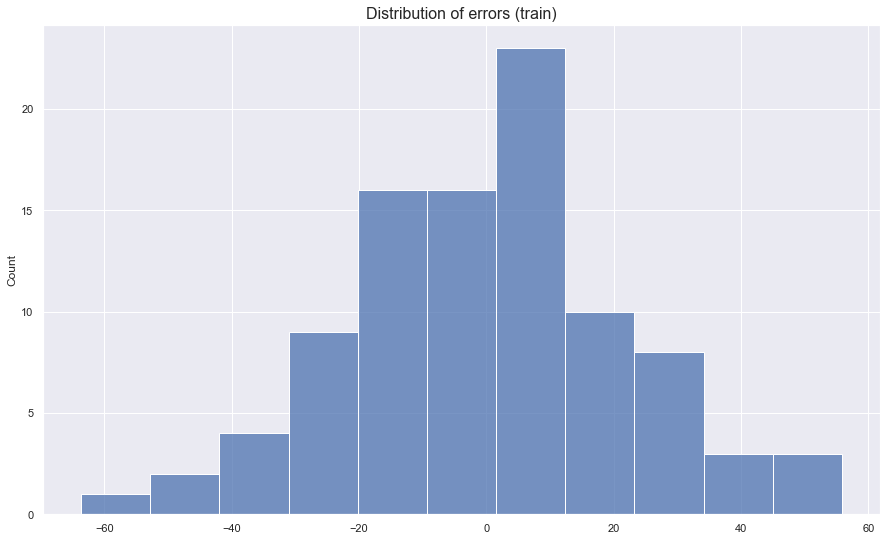

In [61]:
sns.histplot(y_train - pred_train).set_title("Distribution of errors (train)", size=16)
plt.show()

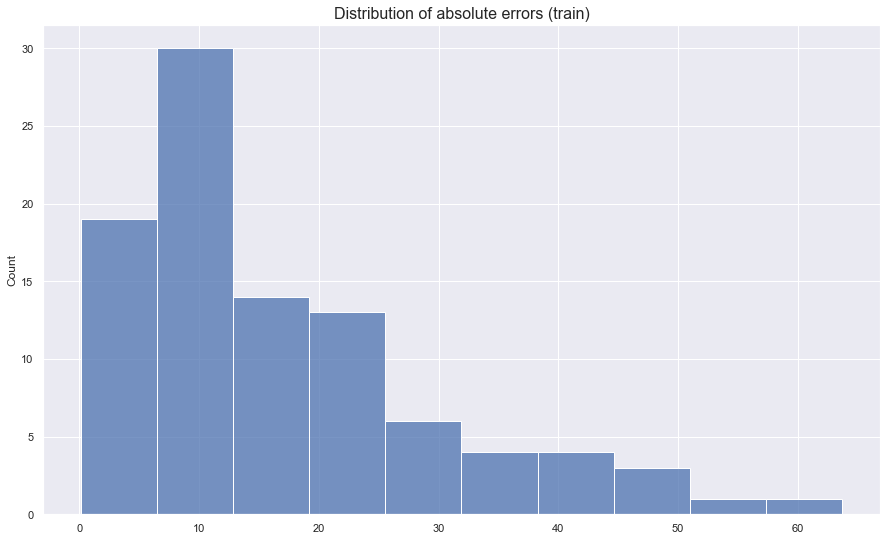

In [62]:
sns.histplot(np.abs(y_train - pred_train)).set_title("Distribution of absolute errors (train)", size=16)
plt.show()

In [63]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 39.94
Testing MAE: 17.12


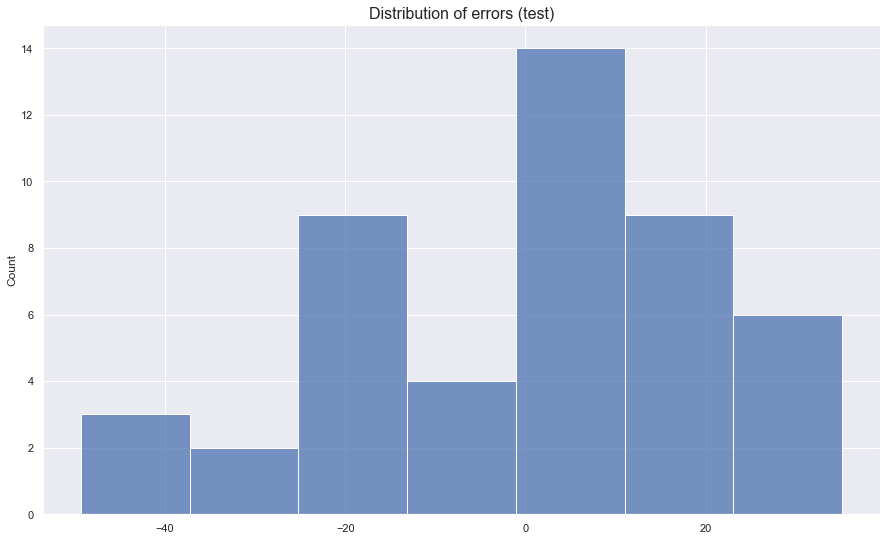

In [65]:
sns.histplot(y_test - pred_test).set_title("Distribution of errors (test)", size=16)
plt.show()

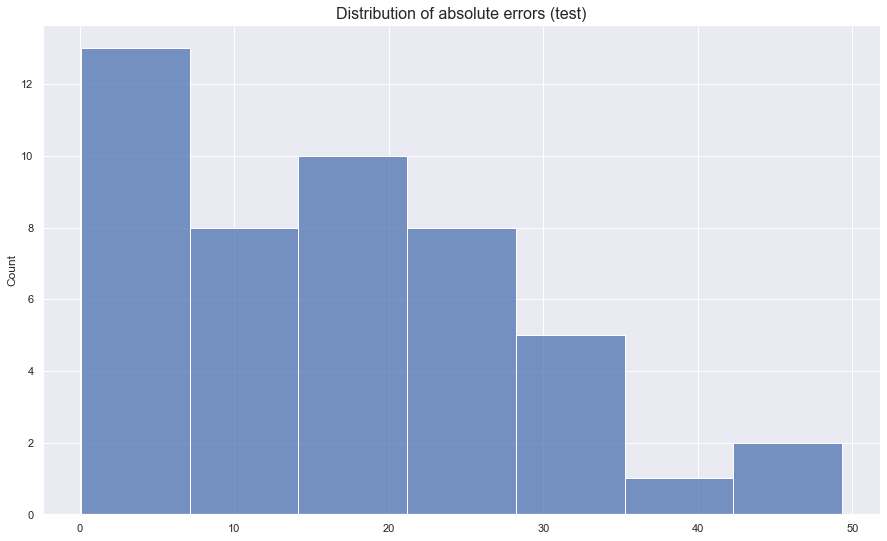

In [66]:
sns.histplot(np.abs(y_test - pred_test)).set_title("Distribution of absolute errors (test)", size=16)
plt.show()

****Commentary*** Comparing the training and testing MAE results, we can see that the model doesn't overfit the data. So we can conslude the model's level of accuracy is satisfactory.

### Bonus

11. <span style="color:red">[BONUS]</span> **Do you notice anything strange when looking at the regression coefficients of the model in the previous answer?** (answer here, not on the response Google Sheet)

The variable <code>generosity</code> is not statistically significant because its p-value (0.399) is greater than the usual significance level of 0.05.  For the results above, we would consider removing <code>generosity</code>, as keeping variables that are not statistically significant can reduce the model’s precision. Another odd aspect is the model constant (0.972) being greater than the significance level of 0.05. This indicates that the evidence is not strong enough to suggest an effect exists in the population. An effect might exist but it's possible that the effect size is too small, the sample size is too small, or there is too much variability for the hypothesis test to detect it.

12. <span style="color:red">[BONUS]</span> The code in the following cell creates a forecasting model using the `prophet` library. Specifically, it fits an additive model (the effect of the seasonality is added to the trend in order to get forecasts) on a dataframe `df` which contains the number of airline passengers over time. Notice how the seasonality in the forecast is too large at the start of the time series and too small at the end (compared to the data it tries to fit). **Modify the Prophet code to account for the effect of growing seasonality.** 

In [72]:
!conda install -c conda-forge fbprophet -y

^C


In [75]:
!pip install phophet

ERROR: Could not find a version that satisfies the requirement phophet (from versions: none)
ERROR: No matching distribution found for phophet


In [70]:
# DO NOT DELETE >>> RUN THIS CELL!

from prophet import Prophet

df = pd.read_csv('data/air-passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(24, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

ModuleNotFoundError: No module named 'prophet'